# Dashboards and Widgets


In [1]:
from pathlib import Path

files = Path("files")  # location of test files

In [2]:
from metador_core.plugins import schemas

BibMeta = schemas["core.bib"]
DBMeta = schemas["core.dashboard"]
ImgMeta = schemas["core.imagefile"]

In [3]:
from metador_core.plugins import harvesters
from metador_core.harvester import harvest, metadata_loader, file_harvester_pipeline

HrvFile = harvesters["core.file.generic"]
HrvImgDim = harvesters["core.imagefile.dim"]

ImgMetaLoader = metadata_loader(ImgMeta, use_sidecar=True)
image_pipeline = file_harvester_pipeline(HrvFile, HrvImgDim, ImgMetaLoader)

In [4]:
from metador_core.container import MetadorContainer
from metador_core.packer.utils import embed_file

with MetadorContainer("my-dashboardable-container.h5", "w") as m:
    m.meta["core.bib"] = BibMeta.parse_file(files / "test.bibmeta.yaml")
    
    imgmeta = harvest(ImgMeta, image_pipeline(files / "test.png"))
    n = embed_file(m, "foo/bar", files / "test.png", metadata=imgmeta)
    n.meta[DBMeta] = DBMeta.show(group=1)
    
    n = embed_file(m, "pdffile", files / "test.pdf")
    n.meta[DBMeta] = DBMeta.show(group=1, priority=10)
    
    n = embed_file(m, "jsonfile", files / "test.json")
    n.meta[DBMeta] = DBMeta()
    
    n = embed_file(m, "mdfile", files / "test.md")
    n.meta[DBMeta] = DBMeta()
    
    n = embed_file(m, "htmlfile", files / "test.html")
    n.meta[DBMeta] = DBMeta.show(
        [DBMeta.widget(widget_name="core.file.text.code", group=2), DBMeta.widget(group=2)]
    )

In [5]:
from metador_core.widget.jupyter import Previewable

m = Previewable(MetadorContainer("my-dashboardable-container.h5"))

('widget-api', 'metador_core.widget.jupyter.standalone')
 * Serving Flask app 'metador_core.widget.jupyter.standalone'
 * Debug mode: off


PNG(str)
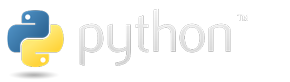

In [6]:
from metador_core.plugins import widgets

widgets["core.file.image"](m["foo/bar"]).show()

Column(height=1680, scroll=True, sizing_mode='fixed', width=1600)
    [0] Row(height=576, scroll=True, sizing_mode='fixed', width=1600)
        [0] Column
            [0] Str(str)
            [1] PDF(str, height=480, sizing_mode='fixed', width=640)
        [1] Column
            [0] Str(str)
            [1] PNG(str, height=480, sizing_mode='fixed', width=640)
    [1] Row(height=576, scroll=True, sizing_mode='fixed', width=1600)
        [0] Column
            [0] Str(str)
            [1] Ace(disabled=True, filename='test.html', height=480, readonly=True, sizing_mode='fixed', value='<html>\n    <..., width=640)
        [1] Column
            [0] Str(str)
            [1] HTML(str, max_height=480, max_width=640)
    [2] FlexBox(objects=[Column
    [0] Str(str)
 ...], sizing_mode='stretch_width')
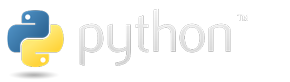

In [7]:
from metador_core.widget.dashboard import Dashboard

Dashboard(m).show()